## Лабораторне заняття №6

# Математичне сподівання та дисперсія
На цьому занятті ми познайомимося з математичним сподіванням та дисперсією розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Математичне сподівання

### 1.1 Дискретні розподіли

Нехай дискретна випадкова величина $\xi$ набуває значень $x_1, x_2, \ldots, x_n$ (це набір усіх можливих значень) з імовірностями $p_1, p_2, \ldots, p_n$.
Тоді її математичне сподівання визначається як
$$\mathsf{E}[\xi] = \sum \limits_{k = 1}^{n} p_k x_k.$$

Реалізуйте відповідну функцію підрахунку математичного сподівання.

In [2]:
def expectation(pk, xk):
    # Місце для Вашого коду
    
    return sum(a * b for a, b in zip(pk, xk))

#### 1.1.1 Біноміальний розподіл

Розглянемо випадкову величину $\xi$ з біноміального розподілу з параметрами $n = 20, p = 0.6$.
Тобто $\xi \sim Binom(20, 0.6)$.

In [3]:
from scipy.stats import binom

n = 20
p = 0.6

Замість того, щоб явно вказувати параметри розподілу в усіх методах класу **binom**, можна визначити екземпляр цього класу з відповідними параметрами і потім застосовувати необхідні методи до цього екземпляру без задання параметрів розподілу.
Це справедливо для всіх класів статистичних розподілів.

In [4]:
xi = binom(n=n, p=p)

Для обрахунку математичного сподівання необхідно знати всі можливі значення випадкової величини та їх відповідні ймовірності.
Прямого методу для отримання цих значень немає.
Однак, можна отримати найменше та найбільше можливе значення випадкової величини.

In [5]:
x_min = xi.a
x_max = xi.b

Оскільки дискретні випадкові величини набувають лише цілих значень, то тепер можна відтворити всю множину.

In [6]:
xk = np.arange(x_min, x_max+1)

Тепер можна отримати й імовірності усіх значень випадкової величини:
$$p_k = p(x_k) = \mathsf{P}(\xi = x_k), \quad 1 \leq k \leq n.$$

In [7]:
pk = xi.pmf(xk)    # Місце для Вашого коду
pk

array([1.09951163e-08, 3.29853488e-07, 4.70041221e-06, 4.23037099e-05,
       2.69686150e-04, 1.29449352e-03, 4.85435071e-03, 1.45630521e-02,
       3.54974396e-02, 7.09948791e-02, 1.17141551e-01, 1.59738478e-01,
       1.79705788e-01, 1.65882266e-01, 1.24411699e-01, 7.46470195e-02,
       3.49907904e-02, 1.23496907e-02, 3.08742268e-03, 4.87487792e-04,
       3.65615844e-05])

Зобразимо графік щільності випадкової величини $\xi$.

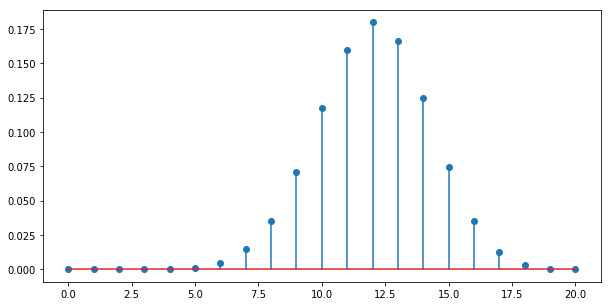

In [8]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду

plt.stem(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

In [9]:
print(expectation(pk, xk))

11.999999999999986


Використовуючи властивості **NumPy**-векторів, обрахунок математичного сподівання можна реалізувати набагато простіше.

Множення **NumPy**-векторів (за допомогою знаку множення **\***) відбувається поелементно.

In [10]:
print(sum(pk * xk))

11.999999999999986


Або використовуючи скалярний добуток (векторне множення).

In [11]:
print(xk.dot(pk))

11.999999999999986


У класах статистичних розподілів підрахунок математичного сподівання реалізований методом **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.mean.html)).

In [12]:
print(xi.mean())

12.0


Математичне сподівання можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [13]:
print(xi.expect())

11.999999999999986


#### 1.1.1 Геометричний розподіл

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.25$.
Тобто $\xi \sim Geom(0.25)$.

In [14]:
from scipy.stats import geom

p = 0.25

In [15]:
xi = geom(p=p)

Для обрахунку математичного сподівання необхідно знати всі можливі значення випадкової величини та їх відповідні ймовірності.
Прямого методу для отримання цих значень немає.
Однак, можна отримати найменше та найбільше можливе значення випадкової величини.

In [16]:
x_min = xi.a
x_max = xi.b

In [17]:
print(x_min, x_max)

1 inf


Верхня межа дорівнює нескінченності, тому можна провести лише ниближені обчислення.

In [18]:
xk = np.arange(x_min, 101)

Тепер можна отримати й імовірності усіх значень випадкової величини:
$$p_k = p(x_k) = \mathsf{P}(\xi = x_k), \quad 1 \leq k \leq n.$$

In [19]:
pk = xi.pmf(xk)   # Місце для Вашого коду

Зобразимо графік щільності випадкової величини $\xi$.

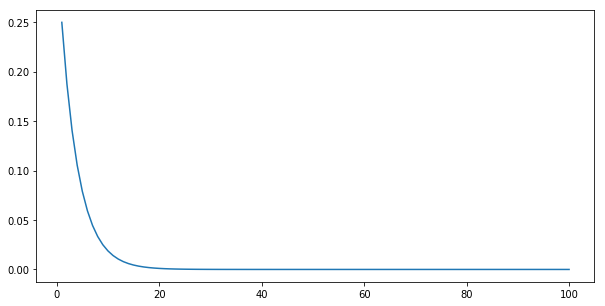

In [20]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду

plt.plot(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

In [21]:
print(expectation(pk, xk))

3.999999999966646


Використовуючи властивості **NumPy**-векторів, обрахунок математичного сподівання можна реалізувати набагато простіше.

Множення **NumPy**-векторів (за допомогою знаку множення **\***) відбувається поелементно.

In [22]:
print(sum(pk * xk))

3.999999999966646


Або використовуючи скалярний добуток (векторне множення).

In [23]:
print(xk.dot(pk))

3.9999999999666453


У класах статистичних розподілів підрахунок математичного сподівання реалізований методом **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.mean.html)).

In [24]:
print(xi.mean())

4.0


Математичне сподівання можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [25]:
print(xi.expect())

3.9999999999999925


### 1.2 Неперервні розподіли

Нехай неперервна випадкова величина $\xi$ має щільність $f(x)$.
Тоді її математичне сподівання визначається як
$$\mathsf{E}[\xi] = \int \limits_{- \infty}^{\infty} x f(x) \, dx.$$

#### 1.2.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу з параметрами $a = -1, b = 4$.
Тобто $\xi \sim Unif(-1, 4)$.

In [26]:
from scipy.stats import uniform

a = -1
b = 4

Пам'ятаємо, що параметри цього розподілу необхідно виразити в аргументах $loc$ та $scale$.

In [27]:
loc = a
scale = b - a

In [28]:
xi = uniform(loc=loc, scale=scale)

Зобразимо графік щільності випадкової величини $\xi$ на відрізку $[a - 1, b + 1]$.

In [29]:
xk = np.arange(a, b, 0.01)            # Місце для Вашого коду
pk = xi.pdf(xk)                       # Місце для Вашого коду

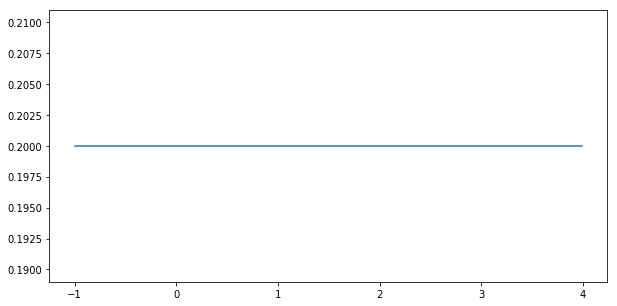

In [30]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду

plt.plot(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

за допомогою методу **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html))

In [31]:
print(xi.mean())

1.5


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [32]:
print(xi.expect())

1.5000000000000002


#### 1.2.1 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ з експоненційного розподілу з параметром $\lambda = 0.75$.
Тобто $\xi \sim Exp(0.75)$.

In [33]:
from scipy.stats import expon

lmd = 0.75

Пам'ятаємо, що параметри цього розподілу необхідно виразити в аргументах $loc$ та $scale$.

In [35]:
loc = 0    # Місце для Вашого коду
scale = 1 / lmd   # Місце для Вашого коду

In [36]:
xi = expon(loc=loc, scale=scale)

Зобразимо графік щільності випадкової величини $\xi$ на відрізку $[-1, 10]$.

In [37]:
xk = np.arange(-1, 10, 0.01)     # Місце для Вашого коду
pk = xi.pdf(xk)                  # Місце для Вашого коду

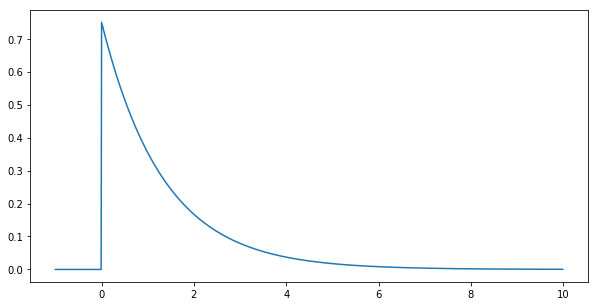

In [38]:
fig = plt.figure(figsize=(10,5))
# Місце для Вашого коду
plt.plot(xk, pk)
plt.show()

Тоді математичне сподівання випадкової величини $\xi$ дорівнює:

за допомогою методу **mean** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.mean.html))

In [39]:
print(xi.mean())

1.3333333333333333


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [40]:
print(xi.expect())

1.3333333333333333


## 2 Дисперсія

Для випадкової величини $\xi$ дисперсія визначається як
$$\mathsf{D}(\xi) = \mathsf{Var}[\xi]
= \mathsf{E} \left[ \left( \xi - \mathsf{E}[\xi] \right)^2 \right]
= \mathsf{E}[\xi^2] - \left( \mathsf{E}[\xi] \right)^2.$$

### 1.1 Дискретні розподіли

Нехай дискретна випадкова величина $\xi$ набуває значень $x_1, x_2, \ldots, x_n$ (це набір усіх можливих значень) з імовірностями $p_1, p_2, \ldots, p_n$.
Тоді для деякої функції $g$ математичне сподівання випадкової величини $g(\xi)$ визначається як
$$\mathsf{E}[g(\xi)] = \sum \limits_{k = 1}^{n} p_k g(x_k).$$

#### 1.1.1 Біноміальний розподіл

Розглянемо випадкову величину $\xi$ з біноміального розподілу з параметрами $n = 20, p = 0.6$.
Тобто $\xi \sim Binom(20, 0.6)$.

In [41]:
from scipy.stats import binom

n = 20
p = 0.6

In [42]:
xi = binom(n=n, p=p)

In [43]:
x_min = xi.a
x_max = xi.b

In [44]:
xk = np.arange(x_min, x_max+1)

In [45]:
pk = xi.pmf(xk)

Тоді дисперсія випадкової величини $\xi$ дорівнює:

In [46]:
g_xk = (xk - expectation(pk, xk))**2
print(expectation(pk, g_xk))

4.79999999999999


У класах статистичних розподілів підрахунок дисперсії реалізований методом **var** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.var.html)).

In [47]:
print(xi.var())

4.800000000000001


Дисперсію можна також порахувати за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.expect.html)).

In [48]:
def f(x):
    return (x - xi.expect())**2
print(xi.expect(f))

4.799999999999991


#### 1.1.2 Геометричний розподіл
Реалізуйте підрахунок дисперсії для $\xi \sim Geom(0.25)$.

### 1.2 Неперервні розподіли

Нехай неперервна випадкова величина $\xi$ має щільність $f(x)$.
Тоді для деякої функції $g$ математичне сподівання випадкової величини $g(\xi)$ визначається як
$$\mathsf{E}[g(\xi)] = \int \limits_{- \infty}^{\infty} g(x) f(x) \, dx.$$

#### 1.2.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу з параметрами $a = -1, b = 4$.
Тобто $\xi \sim Unif(-1, 4)$.

In [49]:
from scipy.stats import uniform

a = -1
b = 4

In [50]:
loc = a
scale = b - a

In [51]:
xi = uniform(loc=loc, scale=scale)

Тоді дисперсія випадкової величини $\xi$ дорівнює:

за допомогою методу **var** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.var.html))

In [52]:
print(xi.var())

2.083333333333333


за допомогою методу **expect** (загальний опис методу в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.expect.html))

In [53]:
print(xi.expect(f))

2.0833333333333335


#### 1.2.2 Експоненційний розподіл
Реалізуйте підрахунок дисперсії для $\xi \sim Exp(0.75)$.

## 3 Метод `stats`

Повертає математичне сподівання та дисперсію випадкової величини.

In [54]:
xi = binom(n=20, p=0.6)
print(xi.stats())

(array(12.), array(4.8))


In [55]:
xi = uniform(-1, 5)
print(xi.stats())

(array(1.5), array(2.08333333))
